# Zero to Pandas Course Project - Analyzing College Majors

This notebook is the capstone project for the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), from Jovian.ml. In this course, I have learned how to use the most popular and powerful Python libraries to conduct data analysis and visualization. The course provides a solid base for further building my data skills through thorough instruction, graded problem sets, and this capstone project. From learning the fundamentals of Python, how to apply Pandas and NumPy effectively, and Matplotlib and Seaborn to visualize my findings, this course has taught me to use key tools in the problem solving and analysis process. 

The dataset used in this analysis is found at https://www.kaggle.com/datasets/tunguz/college-majors. It contains basic data about earnings, population, and employment for different college majors. I will perform exploratory data analysis to answer a few interesting questions about the data. This is the data behind the FiveThirtyEight story "The Economic Guide to Picking a College Major (https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/ ). This data is somewhat outdated, but still useful for the purposes of this project. 

# Downloading the Dataset


**First**, let's download the dataset from Kaggle.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/tunguz/college-majors' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: drewhebert
Your Kaggle Key: ········


100%|██████████| 37.3k/37.3k [00:00<00:00, 20.9MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './college-majors'

In [6]:
import os
os.listdir(data_dir)

['majors-list.csv',
 'women-stem.csv',
 'recent-grads.csv',
 'all-ages.csv',
 'grad-students.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "zerotopandas-course-project-abear9" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abear9/zerotopandas-course-project-abear9" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/abear9/zerotopandas-course-project-abear9


'https://jovian.ai/abear9/zerotopandas-course-project-abear9'

# Data Preparation and Cleaning


Before analyzing this data, I want to prepare and clean the data. I will look for null values, create columns that need to be created, and create final dataframes with cleaner data to analyze and visualize. I will primarily be focusing on the Recent Grads file, which, as a recent grad myself, is more pertinent to me. 

Let's begin by importing the various libraries I will be using in this analysis.

In [11]:
import pandas as pd
import numpy as np 

In [12]:
#I will be loading the 5 csv files in the dataset into dataframes just in case I need them for this analysis.

raw_all_df = pd.read_csv('college-majors/all-ages.csv')
raw_grad_df = pd.read_csv('college-majors/grad-students.csv')
raw_majors_df = pd.read_csv('college-majors/majors-list.csv')
raw_women_stem_df = pd.read_csv('college-majors/women-stem.csv')
raw_recent_grads_df = pd.read_csv('college-majors/recent-grads.csv')

This analysis will primarily look at the data for Recent Grads, but I also want to look into the data with all ages. Let's take a look at the structure of these dataframes.

In [13]:
raw_all_df.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [14]:
raw_all_df.describe()

,Major_code,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
count,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,2.302566e+05,1.661620e+05,1.263078e+05,9725.034682,0.057355,56816.184971,38697.109827,82506.358382
std,1687.753140,4.220685e+05,3.073244e+05,2.424254e+05,18022.040192,0.019177,14706.226865,9414.524761,20805.330126
min,1100.000000,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35000.000000,24900.000000,45800.000000
25%,2403.000000,2.428000e+04,1.728100e+04,1.272200e+04,1101.000000,0.046261,46000.000000,32000.000000,70000.000000
50%,3608.000000,7.579100e+04,5.656400e+04,3.961300e+04,3619.000000,0.054719,53000.000000,36000.000000,80000.000000
75%,5503.000000,2.057630e+05,1.428790e+05,1.110250e+05,8862.000000,0.069043,65000.000000,42000.000000,95000.000000
max,6403.000000,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.156147,125000.000000,78000.000000,210000.000000


In [15]:
raw_recent_grads_df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [16]:
raw_recent_grads_df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


The dataframes contain 173 Major Codes, but a few of the columns for the recent_grads_df only has a count of 172. Let's look into this more.

In [17]:
raw_recent_grads_df[raw_recent_grads_df['Total'].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


It looks like Food Science is missing some values. For the sake of this analysis, I will drop this major from the dataframe, and create a new one.

In [18]:
recent_grads_df = raw_recent_grads_df.drop(raw_recent_grads_df.index[21])
recent_grads_df.describe()


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


To be sure, let's check the index we dropped from the previous dataframe to make sure it's not there in the new one.

In [19]:
recent_grads_df[19:22]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
19,20,3201,COURT REPORTING,1148.0,877.0,271.0,Law & Public Policy,0.236063,14,930,...,223,808,11,0.011690,54000,50000,54000,402,528,144
20,21,2102,COMPUTER SCIENCE,128319.0,99743.0,28576.0,Computers & Mathematics,0.222695,1196,102087,...,18726,70932,6884,0.063173,53000,39000,70000,68622,25667,5144
22,23,2502,ELECTRICAL ENGINEERING TECHNOLOGY,11565.0,8181.0,3384.0,Engineering,0.292607,97,8587,...,1873,5681,824,0.087557,52000,35000,60000,5126,2686,696


We can also see that Unemployment Rate and "ShareWomen" are listed as decimals. For visualization purposes later in the analysis, I will create 2 new columns that show the unemployment rate and percent of women reporting for each major in percentage format.

In [20]:
recent_grads_df['Unemployment Rate Percentage'] = recent_grads_df['Unemployment_rate'] * 100
recent_grads_df['Share of Women Percentage'] = recent_grads_df['ShareWomen'] * 100
recent_grads_df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Unemployment Rate Percentage,Share of Women Percentage
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,37,0.018381,110000,95000,125000,1534,364,193,1.838053,12.056434
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,85,0.117241,75000,55000,90000,350,257,50,11.724138,10.185185
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,16,0.024096,73000,50000,105000,456,176,0,2.409639,15.303738
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,40,0.050125,70000,43000,80000,529,102,0,5.012531,10.731320
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,1672,0.061098,65000,50000,75000,18314,4440,972,6.109771,34.163050


Looking back at the min and max values of "Unemployment Rate", we see the min value is 0. In order to make sure this is not an error, I will check the major(s) that has that low of a rate. 

In [21]:
for major in recent_grads_df.index:
    if recent_grads_df['Unemployment Rate Percentage'][major] == 0:
        print(recent_grads_df['Major'][major])
    

MATHEMATICS AND COMPUTER SCIENCE
MILITARY TECHNOLOGIES
BOTANY
SOIL SCIENCE
EDUCATIONAL ADMINISTRATION AND SUPERVISION


It looks like these 5 majors have an Unemployment Rate of 0. I want to make sure that this is not a mistake by checking one of the above majors:

In [22]:
recent_grads_df[recent_grads_df['Major'] == 'BOTANY']

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Unemployment Rate Percentage,Share of Women Percentage
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,0,0.0,37000,26000,40000,677,184,56,0.0,52.896915


The Botany major only has a sample size of 9. This number differs from the "Total" column, as the "sample size" is the unweighted number of full-time, year-round ONLY respondents for earnings purposes. This small of a sample size suggests that a 0% employment rate is reasonable (i.e. 9/9 in the sample are employed). Thus, I will leave these majors in and keep this information in mind!

Lastly, I want to create a list of "Major Category" values, as I suspect this would be interest for analysis and visualization purposes.

In [23]:
#explode function to ensure proper list creation of unique values
category_list = recent_grads_df['Major_category'].explode().unique()
category_list

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

I will also create a dataframe to answer some questions later.

In [24]:
category_df = pd.DataFrame(category_list)
category_df

,0
0,Engineering
1,Business
2,Physical Sciences
3,Law & Public Policy
4,Computers & Mathematics
5,Industrial Arts & Consumer Services
6,Arts
7,Health
8,Social Science
9,Biology & Life Science


In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abear9/zerotopandas-course-project-abear9" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/abear9/zerotopandas-course-project-abear9


'https://jovian.ai/abear9/zerotopandas-course-project-abear9'

# Exploratory Analysis and Visualization




Now that the data is prepared, let's take a look at some interesting statistics and insights from the dataset.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Major Category Count

I want to take a look at the count of each major category in the dataset. I am choosing this rather than individual major, as there are over 170 majors in this dataset.

In [28]:
category_count = recent_grads_df.Major_category.value_counts()
category_count.head(10)

Engineering                        29
Education                          16
Humanities & Liberal Arts          15
Biology & Life Science             14
Business                           13
Health                             12
Computers & Mathematics            11
Physical Sciences                  10
Social Science                      9
Agriculture & Natural Resources     9
Name: Major_category, dtype: int64

In [29]:
type(category_count)

pandas.core.series.Series

[Text(0, 0.5, 'Respondants')]

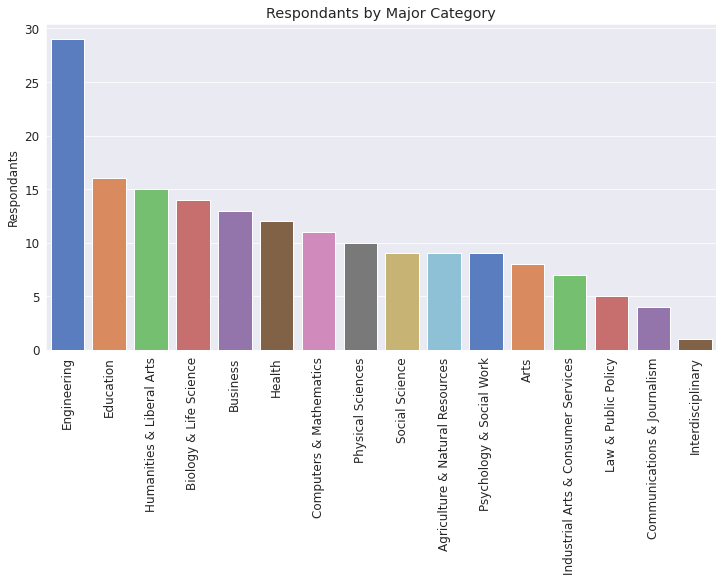

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Respondants by Major Category")
g1 = sns.barplot(x=category_count.index, y=category_count, palette='muted')
g1.set(ylabel='Respondants')

It looks like the major category with the most respondants was Engineering. 

## Median Earnings

Lets now look at a histogram of median earnings across all respondants.

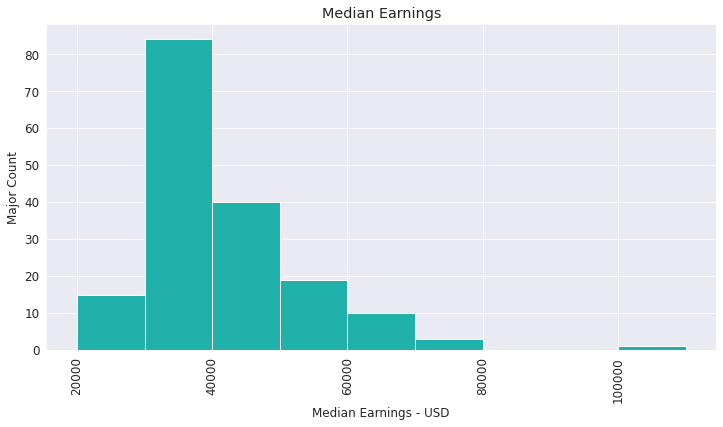

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Median Earnings")
plt.xlabel('Median Earnings - USD')
plt.ylabel('Major Count')
g2 = plt.hist(recent_grads_df.Median, bins=np.arange(20000,120000,10000), color = 'lightseagreen')


In the recent grads dataset, it looks like median earnings are usually $40,000 or less, with some higher outliers (likely due to small sample sizes). This number may seem low doing this analysis in 2022, and given that this dataset is now 10 years old, it may not be very relevant to compare to today's dollars. The number is important, however, in comparing majors within the dataset.

## Gender Breakdown

In my experience, some majors are more evenly split in terms of gender than others. Let's look at the breakdown and distribution of gender in this dataset. The extra column for the % share of women in each major will be useful here. 
* Note: there was no option for non-binary/non-conforming gender on the survey or dataset. Thus, I will only be looking at men/women.

First, let's look at the total Men and Women who responded to this survey.

In [32]:
men_count = recent_grads_df.Men.sum()
men_count

2876426.0

In [33]:
women_count = recent_grads_df.Women.sum()
women_count 

3895228.0

Next, let's take a look at the gender breakdown of the major categories. To do this, I will need to take the average share of women percentage for each major category, then plot them on a graph. I will create a function that will take care of this and return a dataframe with the category and average percentage.

In [34]:
def share_mean(major_category):
    mean_list = []
    for category in category_list:
        mean = round(recent_grads_df.loc[recent_grads_df['Major_category'] == str(category), 'Share of Women Percentage'].mean(),2)
        mean_list.append(mean)
    return mean_list

means = share_mean(category_list)
means_df = pd.DataFrame(category_list, columns=['Category'])
means_df['Mean %'] = means
means_df

,Category,Mean %
0,Engineering,23.89
1,Business,48.32
2,Physical Sciences,50.87
3,Law & Public Policy,48.36
4,Computers & Mathematics,31.18
5,Industrial Arts & Consumer Services,34.95
6,Arts,60.37
7,Health,79.52
8,Social Science,55.40
9,Biology & Life Science,58.72


Let's look at this information in graph form:

<AxesSubplot:title={'center':'Mean % Share of Women'}, xlabel='Mean %', ylabel='Category'>

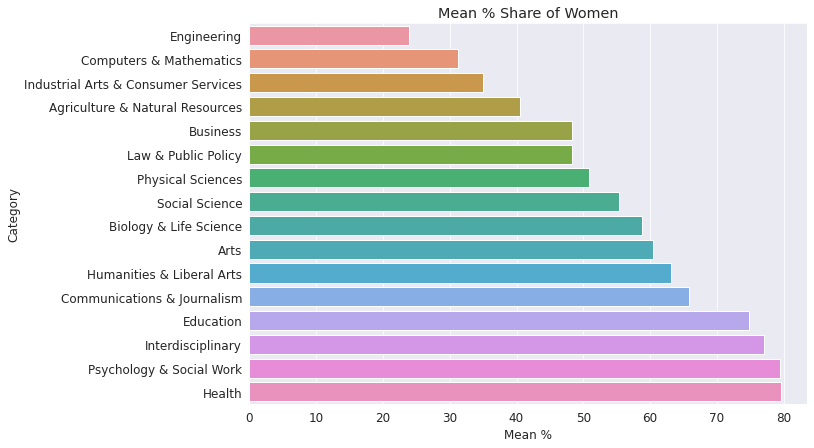

In [35]:
plt.title("Mean % Share of Women")
plt.ylabel('Category')
sns.barplot(y='Category', x='Mean %', data=means_df, order=means_df.sort_values('Mean %').Category)

As we can see from the dataframe and the graph, the "Health" category has the highest average share of women % in this dataset, while "Engineering" majors have the lowest.

## Unemployment Rates

The last column I want to look at is the Unemployment Rate Percentage column I created earlier. Let's create a new dataframe with the 10 majors with the highest unemployment rate.

In [36]:
unemployment_df = recent_grads_df.sort_values(by=['Unemployment Rate Percentage'], ascending=False).head(10)
unemployment_df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Unemployment Rate Percentage,Share of Women Percentage
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,400,0.177226,65000,50000,102000,1142,657,244,17.722641,14.496697
89,90,5401,PUBLIC ADMINISTRATION,5629.0,2947.0,2682.0,Law & Public Policy,0.476461,46,4158,...,789,0.159491,36000,23000,60000,919,2313,496,15.949060,47.646118
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,0.305005,97,6144,...,1100,0.151850,36400,27000,49000,2593,2941,352,15.184981,30.500460
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,368,0.149048,25000,25000,40000,986,870,622,14.904820,79.985906
29,30,5402,PUBLIC POLICY,5978.0,2639.0,3339.0,Law & Public Policy,0.558548,55,4547,...,670,0.128426,50000,35000,70000,1550,1871,340,12.842630,55.854801
105,106,2001,COMMUNICATION TECHNOLOGIES,18035.0,11431.0,6604.0,Computers & Mathematics,0.366177,208,14779,...,2006,0.119511,35000,25000,45000,4545,8794,2495,11.951147,36.617688
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,85,0.117241,75000,55000,90000,350,257,50,11.724138,10.185185
53,54,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,4168.0,3046.0,1122.0,Computers & Mathematics,0.269194,43,3257,...,419,0.113983,41300,20000,46000,2024,1033,263,11.398259,26.919386
79,80,5504,GEOGRAPHY,18480.0,11404.0,7076.0,Social Science,0.382900,179,14057,...,1799,0.113459,38000,30000,50000,5350,6830,1905,11.345863,38.290043
58,59,1401,ARCHITECTURE,46420.0,25463.0,20957.0,Engineering,0.451465,362,34158,...,4366,0.113332,40000,31000,50000,16178,13724,4221,11.333195,45.146489


This dataframe shows that 3 majors of the top 10 in unemployment rates (Nuclear Engineering, Clinical Psychology, and Mining and Mineral Engineering) have very small sample sizes (less than 20). This small of a sample size could negatively impact the Major Unemployment Rate, which is important to keep in mind.

<AxesSubplot:xlabel='Major', ylabel='Unemployment Rate Percentage'>

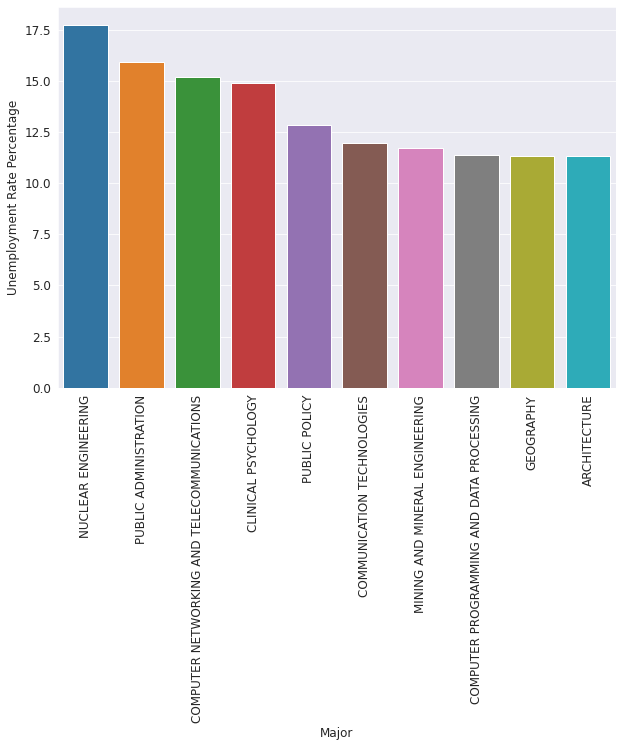

In [37]:
plt.xticks(rotation=90)
sns.barplot(x='Major', y='Unemployment Rate Percentage',data=unemployment_df)

It looks like Nuclear Engineering, a presumably difficult major, has a very high unemployment rate. It is important to consider the low sample size when looking at this number, especially seeing majors like computer programming on the top 10 list. These may also be more competitive job markets.

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abear9/zerotopandas-course-project-abear9" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/abear9/zerotopandas-course-project-abear9


'https://jovian.ai/abear9/zerotopandas-course-project-abear9'

# Asking and Answering Questions





Now that we've seen a brief exploration of various columns and aspects of the dataset, I am going to answer a few interesting questions about the data.

#### Q1: What is the highest median earnings value for each Major Category?

To find out which majors from each category have the highest median pay, we will need to create a function that checks median pay data for us.

In [39]:
def highest_major(major_category):
    highest_list = []
    for category in category_list:
        highest =  recent_grads_df.loc[recent_grads_df['Major_category'] == str(category), 'Median'].max()
        highest_list.append(highest)
    return highest_list
highest_majors = highest_major(category_list)

#convert list to a dict to easily see which value is which category
highest_dict = dict(zip(highest_majors,category_list))
highest_dict        
    

{110000: 'Engineering',
 62000: 'Physical Sciences',
 54000: 'Law & Public Policy',
 53000: 'Computers & Mathematics',
 50000: 'Arts',
 48000: 'Health',
 47000: 'Social Science',
 45000: 'Biology & Life Science',
 41000: 'Education',
 40000: 'Psychology & Social Work',
 35000: 'Interdisciplinary'}

Unsurprisingly, the category with the highest median salary is engineering. If a student is looking for a major category to choose, this will likely be the smart choice purely looking from a median earnings perspective. Another aspect to consider, however, is that Nuclear Engineering had the highest unemployment rate amongst new grads. This just shows that median earnings is not the only important factor to consider. 

#### Q2: Which majors have the highest ratio of non-college and low wage jobs to college jobs?

This question aims to look at the majors with the highest number of grads working in low wage jobs or jobs that do not require a college degree. I will create a new column, called the "Useful Index", which looks at the ratio of college jobs to low wage/non-college jobs. A higher Useful Index means the major is better at placing grads into good jobs. 

In [40]:
recent_grads_df['Useful_Index'] = round(recent_grads_df ['College_jobs'] / (recent_grads_df['Non_college_jobs'] + recent_grads_df['Low_wage_jobs']),2)
recent_grads_df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Unemployment Rate Percentage,Share of Women Percentage,Useful_Index
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,0.018381,110000,95000,125000,1534,364,193,1.838053,12.056434,2.75
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,0.117241,75000,55000,90000,350,257,50,11.724138,10.185185,1.14
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,0.024096,73000,50000,105000,456,176,0,2.409639,15.303738,2.59
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,0.050125,70000,43000,80000,529,102,0,5.012531,10.731320,5.19
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,0.061098,65000,50000,75000,18314,4440,972,6.109771,34.163050,3.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,0.046320,26000,20000,39000,2771,2947,743,4.632028,63.729338,0.75
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,0.065112,25000,24000,34000,1488,615,82,6.511219,81.709881,2.13
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,0.149048,25000,25000,40000,986,870,622,14.904820,79.985906,0.66
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,0.053621,23400,19200,26000,2403,1245,308,5.362065,79.874622,1.55


Now let's look at the top 10 and bottom 10 based on useful index.

In [41]:
recent_grads_df.nlargest(10,'Useful_Index')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Unemployment Rate Percentage,Share of Women Percentage,Useful_Index
13,14,5008,MATERIALS SCIENCE,4279.0,2949.0,1330.0,Engineering,0.310820,22,3307,...,0.023043,60000,39000,65000,2626,391,81,2.304284,31.082028,5.56
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,0.050125,70000,43000,80000,529,102,0,5.012531,10.731320,5.19
23,24,2413,MATERIALS ENGINEERING AND MATERIALS SCIENCE,2993.0,2020.0,973.0,Engineering,0.325092,22,2449,...,0.027789,52000,35000,62000,1911,305,70,2.778881,32.509188,5.10
33,34,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,488.0,232.0,Engineering,0.322222,5,604,...,0.075038,50000,42800,57000,501,50,49,7.503829,32.222222,5.06
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0.000000,42000,30000,78000,452,67,25,0.000000,17.898194,4.91
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,0.044863,48000,39000,58000,151643,26146,6193,4.486272,89.601899,4.69
100,101,2310,SPECIAL NEEDS EDUCATION,28739.0,2682.0,26057.0,Education,0.906677,246,24639,...,0.041508,35000,32000,42000,20185,3797,1179,4.150782,90.667734,4.06
154,155,2312,TEACHER EDUCATION: MULTIPLE LEVELS,14443.0,2734.0,11709.0,Education,0.810704,142,13076,...,0.036546,30000,24000,37000,10766,1949,722,3.654583,81.070415,4.03
119,120,2305,MATHEMATICS TEACHER EDUCATION,14237.0,3872.0,10365.0,Education,0.728033,123,13115,...,0.016203,34000,30000,40000,10699,1977,786,1.620283,72.803259,3.87
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,...,0.065409,60000,45000,75000,23694,5721,980,6.540928,19.941264,3.54


In [42]:
recent_grads_df.nsmallest(10,'Useful_Index')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Unemployment Rate Percentage,Share of Women Percentage,Useful_Index
160,161,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,10510.0,4364.0,6146.0,Industrial Arts & Consumer Services,0.584776,117,8650,...,0.055677,29000,20000,36000,563,7384,3163,5.567686,58.477640,0.05
127,128,6211,HOSPITALITY MANAGEMENT,43647.0,15204.0,28443.0,Business,0.651660,546,36728,...,0.061169,33000,25000,42000,2325,23341,9063,6.116919,65.165991,0.07
39,40,5102,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",2116.0,528.0,1588.0,Physical Sciences,0.750473,31,1778,...,0.071540,46000,38000,53000,162,1475,124,7.154047,75.047259,0.10
75,76,5701,"ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...",2435.0,1869.0,566.0,Industrial Arts & Consumer Services,0.232444,37,2107,...,0.029480,38400,22500,45000,221,1659,81,2.947950,23.244353,0.13
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,...,0.077541,27000,19200,35000,6994,25313,11068,7.754113,66.611945,0.19
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,0.072218,38000,29000,50000,36720,148395,32395,7.221834,47.318952,0.20
62,63,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,17947.0,10285.0,7662.0,Business,0.426924,244,14826,...,0.071983,40000,30000,51000,2236,8937,1758,7.198297,42.692372,0.21
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,0.061215,38000,30000,50000,25320,93889,27968,6.121506,61.572723,0.21
86,87,6209,HUMAN RESOURCES AND PERSONNEL MANAGEMENT,24497.0,6184.0,18313.0,Business,0.747561,264,20760,...,0.059570,36000,28000,45000,2406,9629,1906,5.956965,74.756093,0.21
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,0.069749,45000,34000,56000,11417,39323,10886,6.974901,52.415258,0.23


A related question that I am interested in is the correlation between the Useful Index and median earnings. I will do a scatter plot of the usefulness index compared to the median earnings. 

Text(0.5, 1.0, 'Useful Index and Median Earnings')

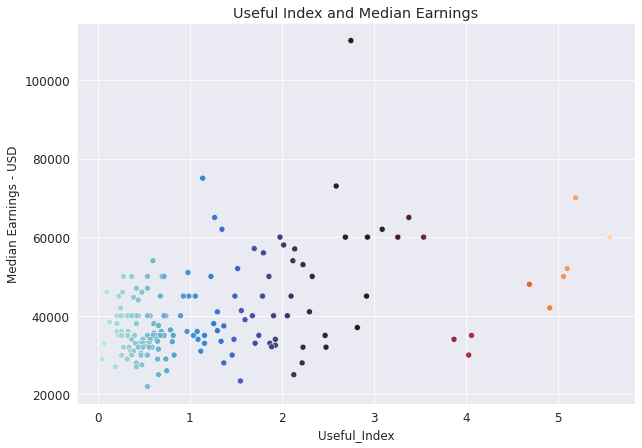

In [69]:
sns.scatterplot(data=recent_grads_df, x='Useful_Index', y='Median', hue='Useful_Index',
               palette='icefire',legend= False)
plt.ylabel('Median Earnings - USD')
plt.title('Useful Index and Median Earnings')

In [44]:
#Find correlation between variables
corr = recent_grads_df['Median'].corr(recent_grads_df['Useful_Index'])
corr

0.43483642219516105

Surprisingly, there seems to be a weak correlation between the Useful Index and the Median Earnings of a given major. Aside from a few outliers, there are plenty of high earning majors with lower useful indexes. Perhaps the Useful Index is a better metric for determining the majors with careers that require a specialized degree rather than a determinator of median earnings.

#### Q3: Which majors have the highest variation in pay?

This question will look at the difference between the P75th (75th percentile Median Earnings) and the P25th (25th percentile Median Earnings) for each major. 

In [45]:
recent_grads_df['Pay_Variation'] = recent_grads_df['P75th'] - recent_grads_df['P25th'] 

In [46]:
recent_grads_df.nlargest(10,'Pay_Variation')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Unemployment Rate Percentage,Share of Women Percentage,Useful_Index,Pay_Variation
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,62000,31500,109000,972,500,220,2.116741,53.571429,1.35,77500
60,61,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,23551.0,8697.0,14854.0,Health,0.630716,38,16620,...,40000,20000,90000,11573,4493,1121,5.552083,63.071632,2.06,70000
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,73000,50000,105000,456,176,0,2.409639,15.303738,2.59,55000
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,65000,50000,102000,1142,657,244,17.722641,14.496697,1.27,52000
14,15,2409,ENGINEERING MECHANICS PHYSICS AND SCIENCE,4321.0,3526.0,795.0,Engineering,0.183985,30,3608,...,58000,25000,74000,2439,947,263,0.633434,18.398519,2.02,49000
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,42000,30000,78000,452,67,25,0.000000,17.898194,4.91,48000
32,33,6099,MISCELLANEOUS FINE ARTS,3340.0,1970.0,1370.0,Arts,0.410180,30,2914,...,50000,25000,66000,693,1714,755,8.937500,41.017964,0.28,41000
54,55,4006,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,3831.0,1667.0,2164.0,Biology & Life Science,0.564866,25,2741,...,41000,20000,60000,1369,921,135,7.523617,56.486557,1.30,40000
43,44,5007,PHYSICS,32142.0,23080.0,9062.0,Physical Sciences,0.281936,142,25302,...,45000,30000,68000,18674,4576,1823,4.822450,28.193641,2.92,38000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,70000,43000,80000,529,102,0,5.012531,10.731320,5.19,37000


In [47]:
recent_grads_df.nsmallest(10,'Pay_Variation')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Unemployment Rate Percentage,Share of Women Percentage,Useful_Index,Pay_Variation
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,40000,40000,40000,0,0,0,0.000000,0.000000,NaN,0
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,41000,41000,43000,509,221,0,10.757946,85.452323,2.30,2000
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,22000,20000,22000,288,338,192,10.494572,87.795993,0.54,2000
19,20,3201,COURT REPORTING,1148.0,877.0,271.0,Law & Public Policy,0.236063,14,930,...,54000,50000,54000,402,528,144,1.168969,23.606272,0.60,4000
48,49,3607,PHARMACOLOGY,1762.0,515.0,1247.0,Biology & Life Science,0.707719,3,1144,...,45000,40000,45000,603,478,93,8.553157,70.771850,1.06,5000
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,34000,29000,35000,346,206,111,0.000000,65.174129,1.09,6000
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,23400,19200,26000,2403,1245,308,5.362065,79.874622,1.55,6800
100,101,2310,SPECIAL NEEDS EDUCATION,28739.0,2682.0,26057.0,Education,0.906677,246,24639,...,35000,32000,42000,20185,3797,1179,4.150782,90.667734,4.06,10000
119,120,2305,MATHEMATICS TEACHER EDUCATION,14237.0,3872.0,10365.0,Education,0.728033,123,13115,...,34000,30000,40000,10699,1977,786,1.620283,72.803259,3.87,10000
151,152,5404,SOCIAL WORK,53552.0,5137.0,48415.0,Psychology & Social Work,0.904075,374,45038,...,30000,25000,35000,27449,14416,4344,6.882792,90.407454,1.46,10000


Looking at the results of this calculation, it seems that the lowest variation majors are those with a lower ceiling. The 75th percentile earnings of these low variance majors are much lower than those of the higher variation majors, indicating that, although some majors have high median earnings, this does not necessarily represent the whole population.

#### Q4: How do median earnings and % share of women in certain majors relate?

We are all aware of the gender wage gap, even between equally qualified men and women. While this has thankfully improved over recent years, there still exists a gap between the earnings of men and women and much work to do in this area. Some suggest this is due to women opting for lower paying majors. Although this dataset is a few years old now, I am still interested to see if there is a relationship between the share of women in a major and median earnings. 

Text(0.5, 1.0, 'Share of Women to Median Earnings')

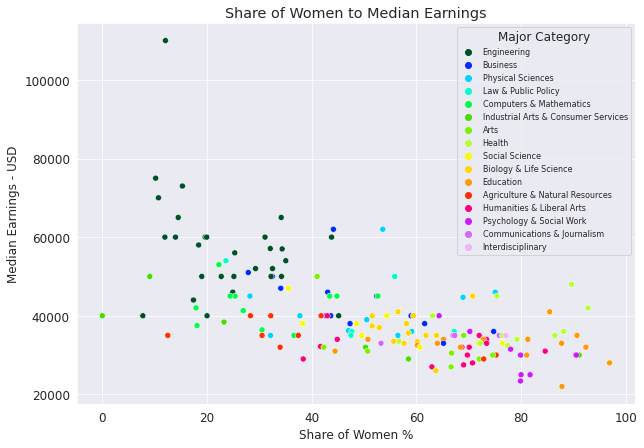

In [73]:
sns.scatterplot(data=recent_grads_df, x='Share of Women Percentage', y='Median', hue='Major_category', palette='gist_ncar')
plt.legend(title='Major Category', fontsize='8',title_fontsize='12')
plt.ylabel('Median Earnings - USD')
plt.xlabel('Share of Women %')
plt.title('Share of Women to Median Earnings')

Based on this graph, it looks like the majors dominated by women pay less than those dominated by men. 

#### Q5: Which major's median earnings increase the most with a grad degree?

For many students, undergrad is not the end. Many fields of study require a graduate degree even for entry level jobs. In addition, a graduate degree could be a very lucrative investment. The grad_df has information comparing the. Grad median pay and the undergrad median pay. I will find the difference in median pay for majors represented and find the majors with the biggest jump in median pay once a grad degree is earned, then plot it to view the data more clearly.

In [79]:
grad_df = raw_grad_df.copy()
grad_df

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,5203,COUNSELING PSYCHOLOGY,Psychology & Social Work,51812,724,38468,28808,1420,0.035600,50000.0,...,16781,12377,8502,835,0.063200,40000.0,25000,50000.0,0.755354,0.250000
169,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,22716,355,16612,12022,782,0.044958,70000.0,...,6519,4368,3033,357,0.075556,46000.0,30000,70000.0,0.777014,0.521739
170,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,114971,1766,78132,58825,1732,0.021687,135000.0,...,26320,16221,12185,1012,0.058725,51000.0,35000,87000.0,0.813718,1.647059
171,2303,SCHOOL STUDENT COUNSELING,Education,19841,260,11313,8130,613,0.051400,56000.0,...,2232,1328,980,169,0.112892,42000.0,27000,51000.0,0.898881,0.333333


In [83]:
grad_df['Median_Difference'] = grad_df['Grad_median'] - grad_df['Nongrad_median']
diff_df = grad_df.nlargest(10,'Median_Difference')
diff_df

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium,Median_Difference
170,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,114971,1766,78132,58825,1732,0.021687,135000.0,...,16221,12185,1012,0.058725,51000.0,35000,87000.0,0.813718,1.647059,84000.0
160,3609,ZOOLOGY,Biology & Life Science,106415,1978,80607,60310,1723,0.020928,110000.0,...,34015,25588,1680,0.047065,55000.0,35000,88000.0,0.667970,1.000000,55000.0
152,3600,BIOLOGY,Biology & Life Science,1085977,21994,898342,703347,19368,0.021105,95000.0,...,512669,394936,28639,0.052907,54000.0,37000,80000.0,0.601913,0.759259,41000.0
164,3601,BIOCHEMICAL SCIENCES,Biology & Life Science,128892,2765,109944,90589,2728,0.024212,96000.0,...,43165,34108,2888,0.062710,55000.0,36000,85000.0,0.687637,0.745455,41000.0
142,4006,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,Biology & Life Science,5982,118,5032,3879,239,0.045342,95000.0,...,4206,3116,184,0.041913,55000.0,40000,93000.0,0.537080,0.727273,40000.0
154,5003,CHEMISTRY,Physical Sciences,464784,8694,336838,273532,10411,0.029981,100000.0,...,180034,145119,10316,0.054195,60000.0,40000,90000.0,0.622350,0.666667,40000.0
155,3608,PHYSIOLOGY,Biology & Life Science,59363,1155,50450,38252,1078,0.020921,90000.0,...,25501,18261,1284,0.047937,50000.0,35000,78000.0,0.630301,0.800000,40000.0
159,3607,PHARMACOLOGY,Biology & Life Science,8853,168,7571,6238,188,0.024230,105000.0,...,3126,2463,57,0.017908,66000.0,38000,105000.0,0.662699,0.590909,39000.0
158,3603,MOLECULAR BIOLOGY,Biology & Life Science,37872,875,32729,26944,950,0.028207,85000.0,...,15914,11602,679,0.040921,50000.0,31000,75000.0,0.648094,0.700000,35000.0
30,6202,ACTUARIAL SCIENCE,Business,2472,56,2020,1725,162,0.074244,110000.0,...,6666,6040,266,0.038373,76000.0,53000,125000.0,0.236103,0.447368,34000.0


Text(0.5, 0, 'Grad Major')

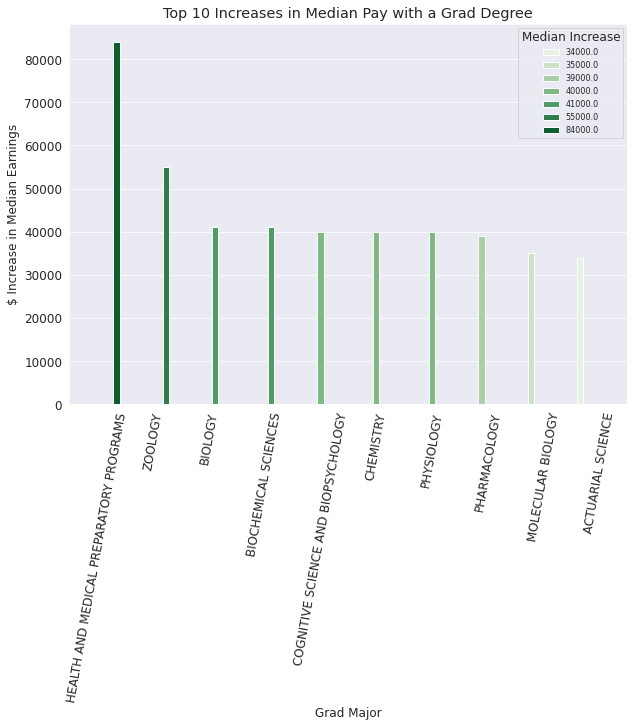

In [110]:
sns.barplot(data=diff_df, x='Major', y='Median_Difference', hue='Median_Difference', palette='Greens')
plt.xticks(rotation=80)
plt.legend(title='Median Increase', fontsize='8',title_fontsize='12')
plt.title('Top 10 Increases in Median Pay with a Grad Degree')
plt.ylabel('$ Increase in Median Earnings')
plt.xlabel('Grad Major')

Health and Medical grad programs lead to a whopping $84,000 increase in median earnings. This isn't too surprising, as becoming a doctor is one of the most lucrative careers one can enter. Interestingly, Zoology grad degrees provide a very large jump in median pay, especially considering how low the recent grad median pay number was for this Major. My guess is that this is likely due to Veterinary degrees - required to become a Vet - being included in "Zoology". 

Let us save and upload our work to Jovian before continuing.

In [111]:
import jovian

In [112]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abear9/zerotopandas-course-project-abear9" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/abear9/zerotopandas-course-project-abear9


'https://jovian.ai/abear9/zerotopandas-course-project-abear9'

# Inferences and Conclusion

This data, while somewhat outdated, paints a picture of what majors lead to the best monetary outcomes, which categories provide the best return on investment, and the gender breakdown of these categories. In summary of the analysis:

> - Engineering Degrees are the most lucrative, or provide the highest median earnings across the board
> - Majors placing more recent graduates into jobs requiring college degrees than non-college degree or law wage jobs does not have a strong correlation with median earnings
> - Some degrees with high median earnings potential experience large swings from the top salaries to the bottom salaries, suggesting a competitive market for the higher paying jobs 
> - Many of the majors with a higher concentration of women recent grads lead to low median earnings, which likely contributes to the inequality of the gender wage gap
> - Going to grad school can drastically improve median earnings potential, especially for majors with low median earnings for only undergraduate degree holders

It is important to note that college is not simply a financial decision, although this is the case for most people. As a recent grad from a high potential earning major myself, I find this analysis very interesting and timely. Ultimately, there is a balance between passion and utility in earning a college degree, and there are many options to satisfy both requirements out there.  

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

This data set has even more potential for analysis, especially comparing the file with grads of all ages to recent grads. One interesting point could be to look at the majors with the highest pay ceilings; that is, the majors where graduates go on to earn the highest salaries over their careers. Overall, there is much more in this data to analyze college as a purely financial investment, looking at the utility and ROI of a degree.

In [118]:
import jovian

In [ ]:
jovian.commit(filename='college-major-survey-data-analysis')

<IPython.core.display.Javascript object>